<a href="https://colab.research.google.com/github/raj-027/ML-Projects/blob/main/Credit_card_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("/content/fraudTrain.csv")
test_data = pd.read_csv("/content/fraudTest.csv")

print(f'my traing data first 5 rows {train_data.head()}')
print(f'my test data first 5 rows {test_data.head()}')


my traing data first 5 rows    Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Ril

Preprocessing

In [ ]:
# Checking for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat            

In [ ]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [ ]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

In [ ]:
# Droping not required column for fraud detection
drop_cols = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'dob', 'trans_num']

train_data = train_data.drop(columns=drop_cols)
test_data = test_data.drop(columns=drop_cols)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']

for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    label_encoders[col] = le


In [ ]:
X_train = train_data.drop(columns=['is_fraud'])
y_train = train_data['is_fraud']

X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']


In [ ]:
# Normalizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9966453954686494
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    170092
         1.0       0.74      0.31      0.44       718

    accuracy                           1.00    170810
   macro avg       0.87      0.65      0.72    170810
weighted avg       1.00      1.00      1.00    170810

Confusion Matrix:
 [[170015     77]
 [   496    222]]


In [ ]:
import seaborn as sns

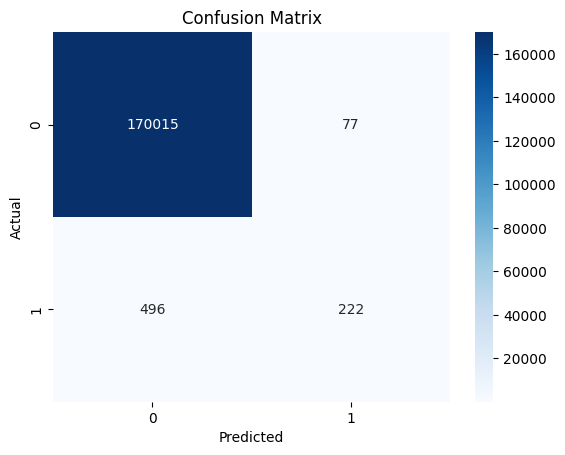

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
